In [14]:
import math
from math import tanh

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn.metrics import mean_squared_error

In [15]:
def plot_training_data(X, Y):
    plt.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap='bwr')
    plt.show()


def plot_training_data_and_activations(X, Y, activations):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=activations, c=Y, cmap='bwr')
    ax.set_xticks([0, 0.5, 1])
    ax.set_xlim([0, 1])
    ax.set_xlabel('x1')
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('x2')
    ax.set_zticks([0, 0.5, 1])
    ax.set_zlim([0, 1])
    ax.set_zlabel('Activation')
    plt.tight_layout()
    plt.show()


def plot_error_gradient(W1, W2, E, final_w1, final_w2, final_e):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(xs=W1, ys=W2, zs=E, c=E, cmap='viridis')
    ax.scatter(xs=final_w1, ys=final_w2, zs=final_e, c='r', s=300)
    ax.set_xlabel('w1')
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_ylabel('w2')
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_zlim([0, 1])
    ax.set_zticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_zlabel('Error')
    plt.show()


def generate_data(n, label):
    X = []
    Y = []

    for x1, x2 in zip(np.random.randint(low=0, high=100, size=n), np.random.randint(low=0, high=100, size=n)):
        if label == 'AND':
            if x1 >= 50 and x2 >= 50:
                Y.append(1)
            else:
                Y.append(0)
        if label == 'OR':
            if x1 >= 50 or x2 >= 50:
                Y.append(1)
            else:
                Y.append(0)
        if label == 'XOR':
            if (x1 >= 50 > x2) or (x1 < 50 <= x2):
                Y.append(1)
            else:
                Y.append(0)

        X.append([x1/100, x2/100])

    return np.asarray(X), np.asarray(Y)

In [16]:
class Perceptron(object):
    def __init__(self, no_of_inputs=2, epochs=100, learning_rate=0.2, activation_function='binary', bias=True):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.activation_function = activation_function
        self.bias = bias

    def predict(self, inputs):
        if self.bias:
            summation = np.dot(inputs, self.weights[1:]) + self.weights[0] * 1
        else:
            summation = np.dot(inputs, self.weights[1:])

        return self._activation(summation)

    def train(self, training_inputs, labels):
        for e in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = (label - prediction)
                d_error = error * self._activation_derivative(prediction)
                self.weights[1:] += self.learning_rate * d_error * inputs
                self.weights[0] += self.learning_rate * d_error * 1

    def _activation(self, summation):
        if self.activation_function == 'binary':
            if summation > 0:
                return 1
            else:
                return 0
        if self.activation_function == 'identity':
            return summation
        if self.activation_function == 'relu':
            if summation > 0:
                return summation
            else:
                return 0
        if self.activation_function == 'tanh':
            return tanh(summation)
        if self.activation_function == 'sigmoid':
            return 1 / (1 + math.e ** -summation)
        if self.activation_function == 'softplus':
            return math.log((1 + math.e ** summation))

    def _activation_derivative(self, output):
        if self.activation_function == 'binary':
            return 1
            # Mathematically, the derivative of the binary activation function is always 0. The initial definition
            # of the perceptron by Rosenblatt did not consider derivatives as used for other activation functions.
            # Therefore, we simply return 1 in this case to enable a valid weight update.
        if self.activation_function == 'identity':
            return 1
        if self.activation_function == 'relu':
            if output < 0:
                return 0
            else:
                return 1
        if self.activation_function == 'tanh':
            return 1 - output ** 2
        if self.activation_function == 'sigmoid':
            return output * (1 - output)
        if self.activation_function == 'softplus':
            return 1 / (1 + math.e ** -output)

In [17]:
def train():
    np.random.seed(1)
    validation_inputs = [np.array([1, 1]), np.array([1, 0]), np.array([0, 1]), np.array([0, 0])]
    training_inputs, labels = generate_data(100, 'OR')

    plot_training_data(training_inputs, labels)

    perceptron = Perceptron(activation_function='sigmoid')
    perceptron.train(training_inputs, labels)

    for x in validation_inputs:
        print(x, '-->', perceptron.predict(x))

    predictions = []

    for x in training_inputs:
        predictions.append(perceptron.predict(x))

    plot_training_data_and_activations(training_inputs, labels, predictions)


def gradient():
    np.random.seed(1)
    training_inputs, labels = generate_data(100, 'XOR')

    perceptron = Perceptron(activation_function='binary', bias=False)

    weights1 = []
    weights2 = []
    errors = []

    for w1 in np.arange(start=-1, stop=1, step=0.05):
        for w2 in np.arange(start=-1, stop=1, step=0.05):
            perceptron.weights[1] = w1
            perceptron.weights[2] = w2

            predictions = []

            for x, y in zip(training_inputs, labels):
                predictions.append(perceptron.predict(x))

            e = mean_squared_error(labels, predictions)

            weights1.append(w1)
            weights2.append(w2)
            errors.append(e)

    perceptron.weights[1] = 0.0
    perceptron.weights[2] = 0.0
    perceptron.train(training_inputs, labels)

    predictions = []

    for x, y in zip(training_inputs, labels):
        predictions.append(perceptron.predict(x))

    final_e = mean_squared_error(labels, predictions)

    plot_error_gradient(weights1, weights2, errors, final_w1=perceptron.weights[1], final_w2=perceptron.weights[2], final_e=final_e)


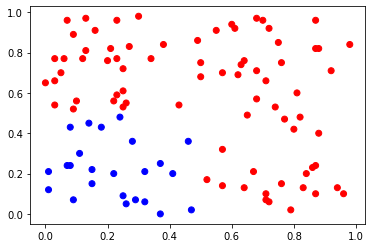

[1 1] --> 0.999697699833544
[1 0] --> 0.8712548336585629
[0 1] --> 0.936291538201477
[0 0] --> 0.02919640087822114


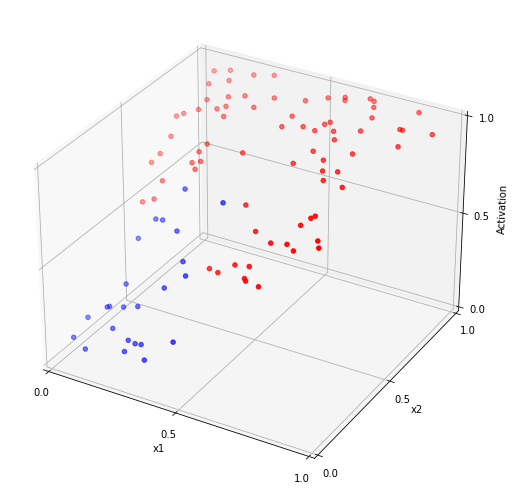

In [18]:
train()

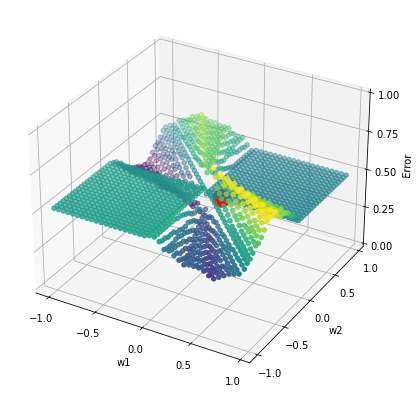

In [19]:
gradient()